# Project 2
## DSI-MiSK-01: Practice with kaggle


The goal for this project is:

Creating and iteratively refining regression and classification models Using Kaggle to practice the modeling process

The main task is creating two models with the highest possible accuracy based on the Ames Housing Dataset. Those models will predict the following:

* The price of a house at sale (regression)
* Whether a house sale was abnormal or not (classification)


## Step 1: Load the data and perform basic operations.

### 1. Load the data.

In [343]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing 
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import LogisticRegression



sns.set_style('darkgrid')     

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [344]:
ames_test=pd.read_csv("../project_2/LR/data/test.csv")
#ames_test.head()

In [345]:
ames_train=pd.read_csv("../project_2/LR/data/train.csv")
# ames_train.head()

In [347]:
ames_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,138500


### 2.concat two dataframes together

In [348]:
ames=pd.concat([ames_train,ames_test], sort=False,ignore_index=True)
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500.0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000.0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000.0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,174000.0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,138500.0


### 3. Find Correlated Features

In [349]:
def correlation_heat_map(df):
    
    #correlation
    corr_ = df.corr()
    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(35, 24))
    
    #create mask for the upper triangle 
    mask = np.zeros_like(corr_, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Plot the heatmap with Seaborn.
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    ax = sns.heatmap(corr_, mask=mask, annot=True, cmap=cmap)
    
    # Resize the lable 
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=80)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
    
    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()
    
    return corr_

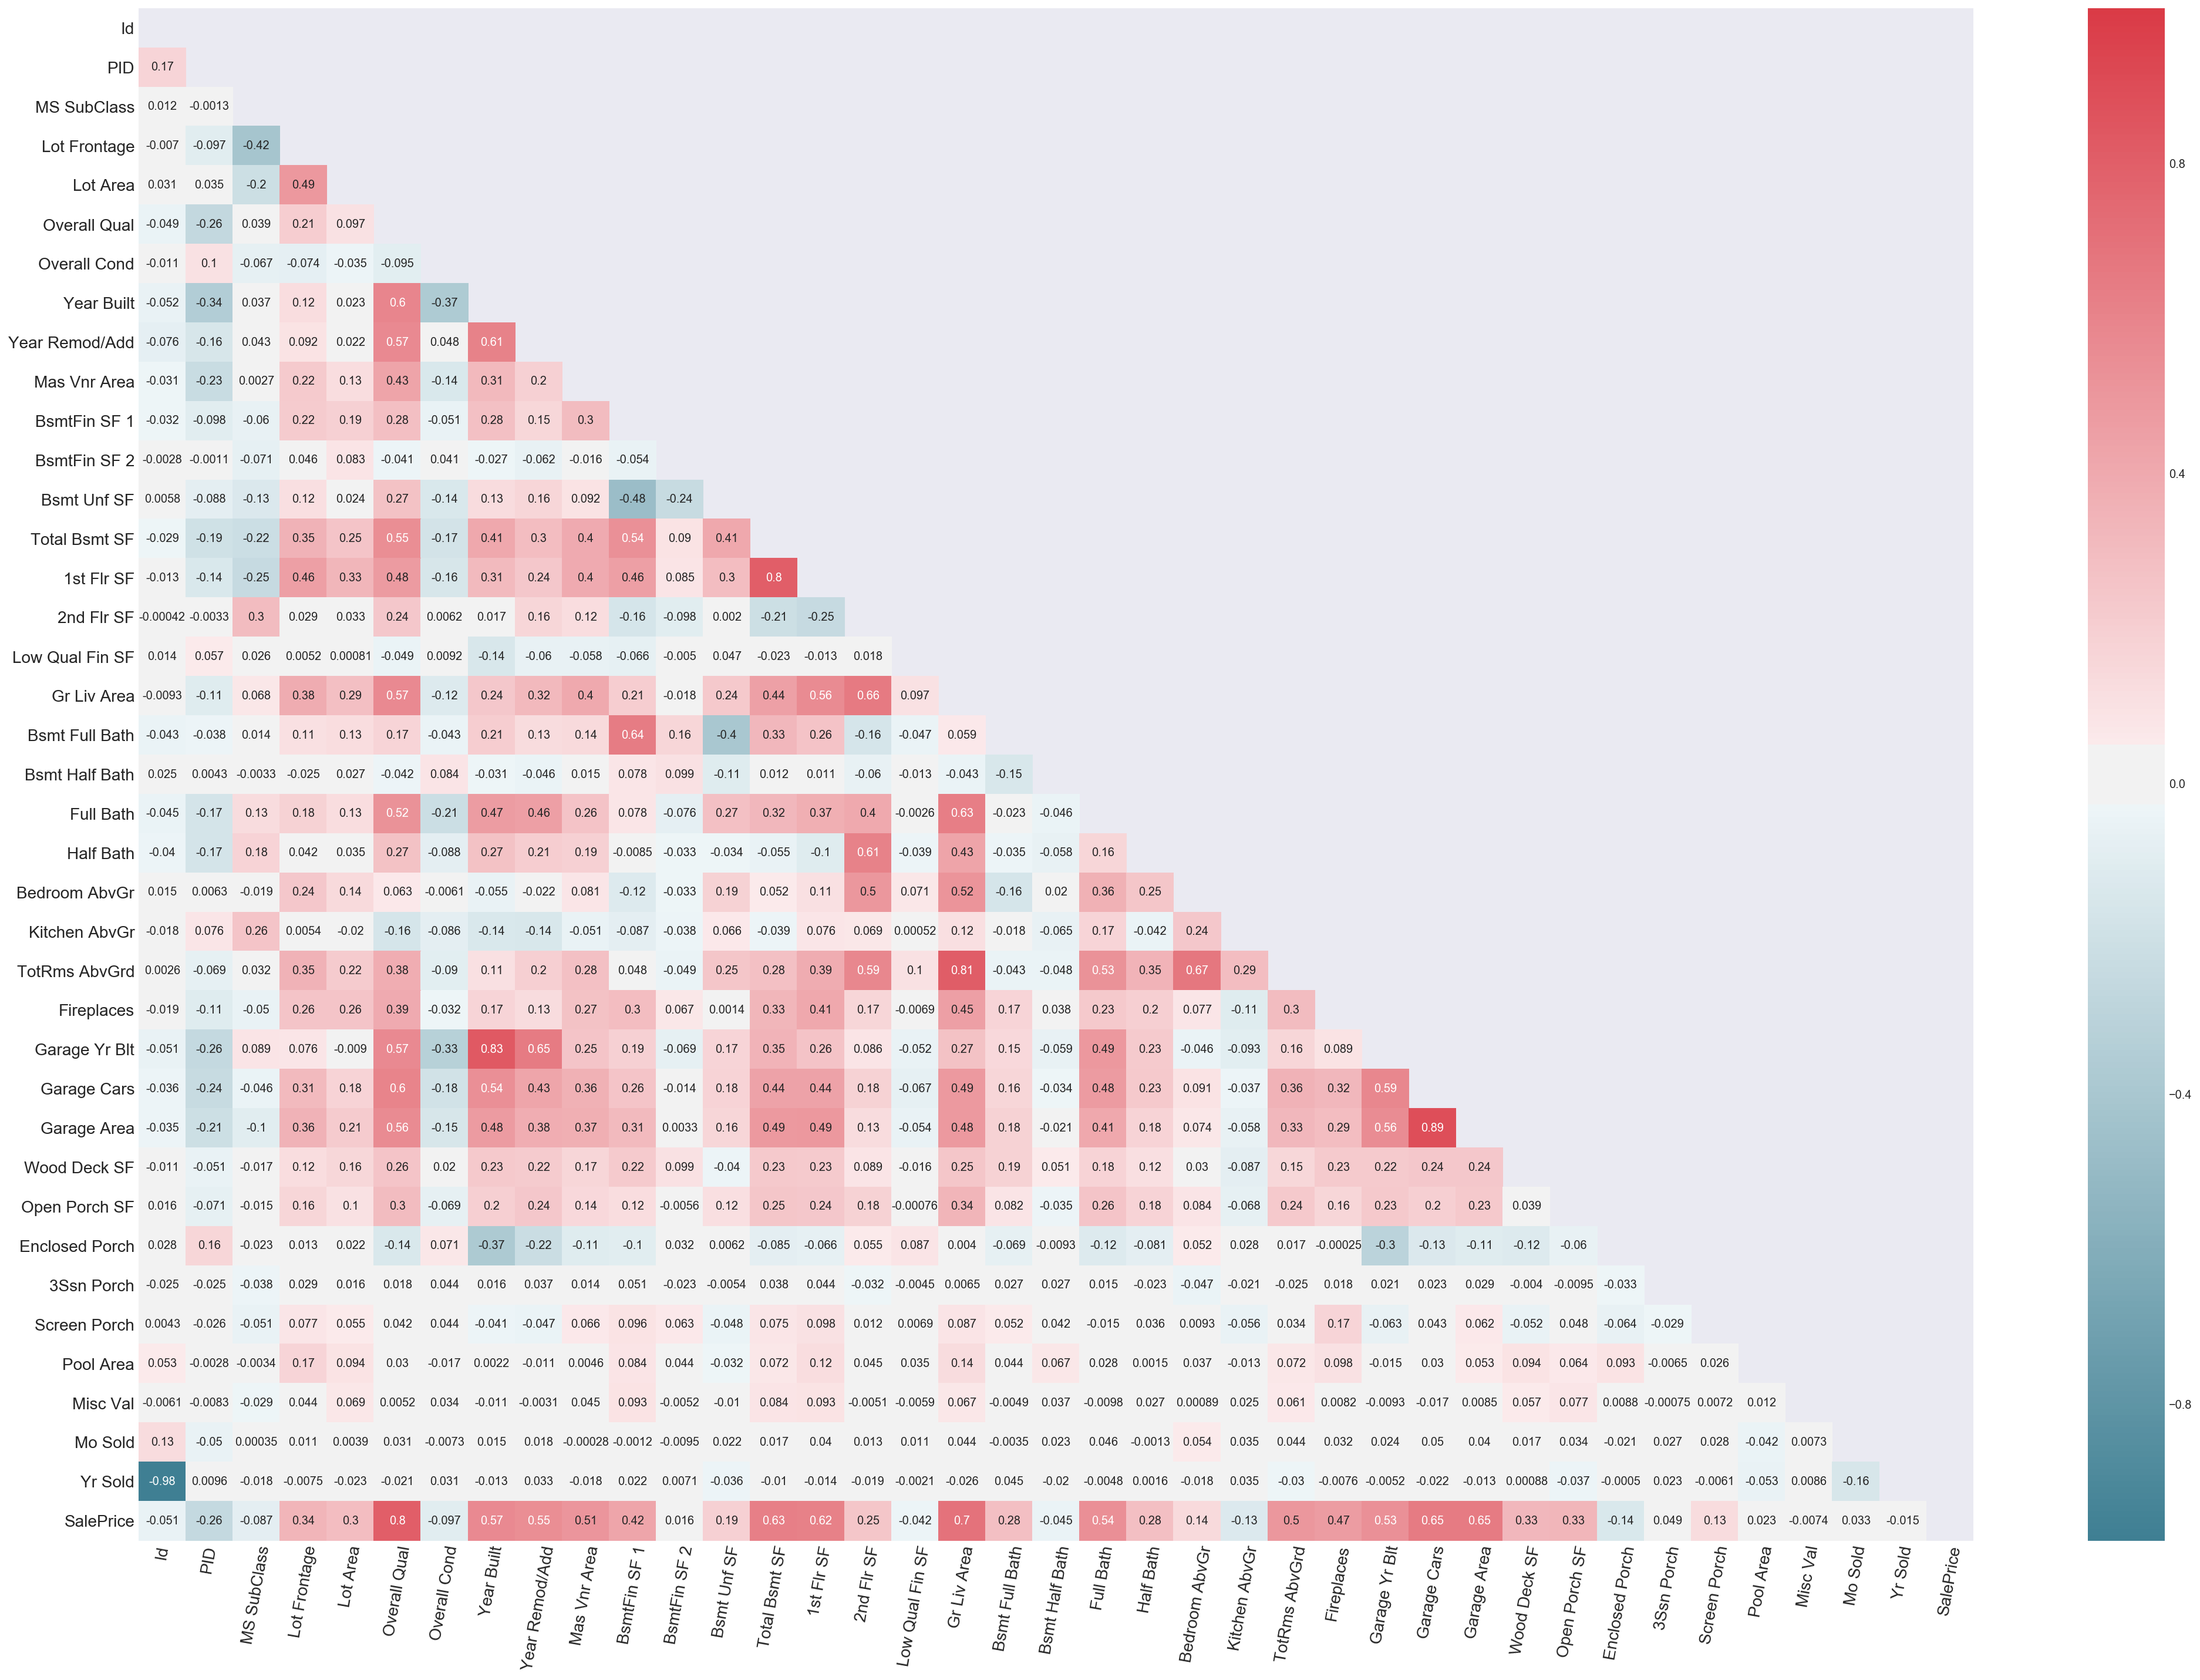

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Id,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.051398
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.255052
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.087335
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.341842
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.296566
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.800207
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.097019
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.571849
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.550370
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.512230


In [350]:
correlation_heat_map(ames)

## Step 2: Conduct exploratory data analysis on this data set 

### 1. Dealing with missing values

In [351]:
# number of missing values
ames.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
                  ... 
Pool Area            0
Pool QC           2917
Fence             2358
Misc Feature      2824
Misc Val             0
Mo Sold              0
Yr Sold              0
Sale Type            0
Sale Condition     879
SalePrice          879
Length: 82, dtype: int64

In [352]:
# find the missing values ratio
ames_nan = (ames.isnull().sum() / len(ames)) * 100
ames_nan = ames_nan.drop(ames_nan[ames_nan == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :ames_nan})
missing_data

,Missing Ratio
Pool QC,99.556314
Misc Feature,96.382253
Alley,93.242321
Fence,80.477816
Fireplace Qu,48.532423
SalePrice,30.000000
Sale Condition,30.000000
Lot Frontage,16.723549
Garage Yr Blt,5.426621
Garage Cond,5.426621


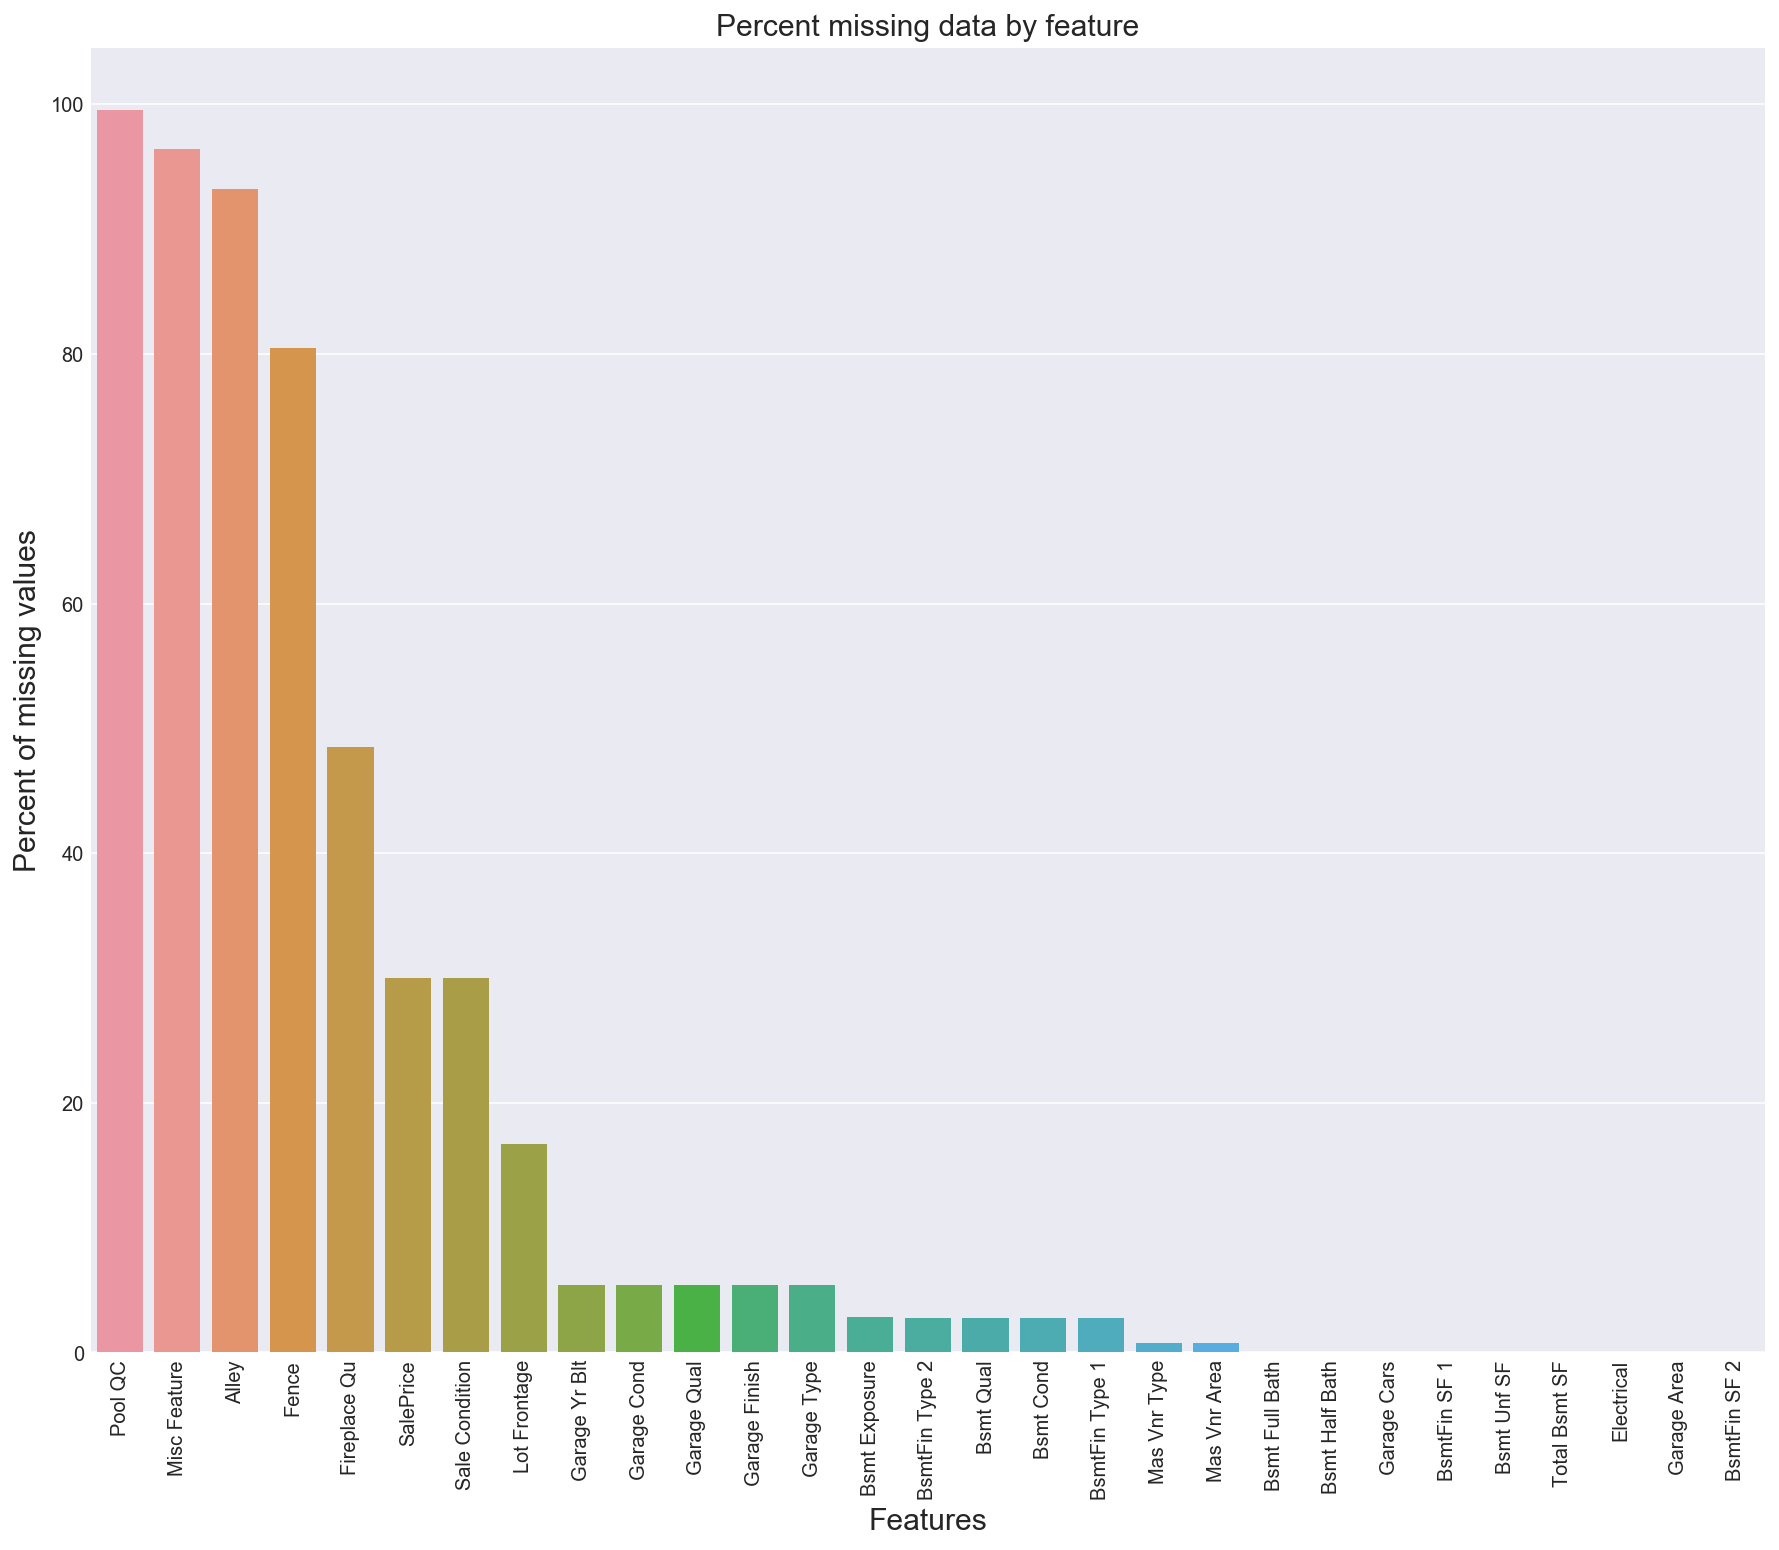

In [353]:
#plot the missing values
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=ames_nan.index, y=ames_nan)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15);

##### Impute missing values by proceeding sequentially through features with missing values

* ##### Pool QC: 
data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.


In [354]:
ames["Pool QC"] = ames["Pool QC"].fillna("None")

* ##### Misc Feature:
data description says NA means "no misc feature"

In [355]:
ames["Misc Feature"] = ames["Misc Feature"].fillna("None")

* ##### Alley:
data description says NA means "no alley access"

In [356]:
ames["Alley"] = ames["Alley"].fillna("None")


* ##### Fence:
data description says NA means "no fence"

In [357]:
ames["Fence"] = ames["Fence"].fillna("None")

* ##### Fireplace Qu:
data description says NA means "no fireplace"

In [358]:
ames["Fireplace Qu"] = ames["Fireplace Qu"].fillna("None")

* ##### Lot Frontage:
Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [359]:
# ames["Lot Frontage"].value_counts(dropna=False)

In [360]:
# ames["Lot Frontage"].isnull().sum()

In [361]:
ames.groupby("Neighborhood")['Lot Frontage'].describe()

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
Blmngtn,20.0,46.900000,4.919350,43.0,43.00,43.0,53.00,53.0
Blueste,10.0,27.300000,5.313505,24.0,24.00,24.0,32.25,35.0
BrDale,30.0,21.500000,1.137147,21.0,21.00,21.0,21.00,24.0
BrkSide,95.0,55.789474,12.722818,50.0,50.00,51.0,58.50,144.0
ClearCr,20.0,88.150000,22.628057,62.0,78.00,80.5,93.25,155.0
CollgCr,220.0,71.336364,15.940401,36.0,64.00,70.0,78.00,133.0
Crawfor,83.0,69.951807,19.141262,40.0,54.00,70.0,80.00,130.0
Edwards,178.0,66.910112,26.372019,24.0,58.25,65.0,74.00,313.0
Gilbert,111.0,74.207207,28.386654,41.0,59.00,64.0,75.00,195.0


In [362]:
# print(ames[ames["Lot Frontage"].isnull()][None])
# ames["Lot Frontage"].isnull().sum(axis=1)
for col in ames["Lot Frontage"]:
    
    if np.logical_not(ames["Lot Frontage"].isnull()).count==False:
        print (col)
    


In [363]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
ames["Lot Frontage"] = ames.groupby("Neighborhood")["Lot Frontage"].transform(lambda x: x.fillna(x.median()))

In [364]:
ames["Lot Frontage"] = ames["Lot Frontage"].transform(lambda x: x.fillna(x.median()))

In [365]:
ames[['Lot Frontage', "Neighborhood"]][ames["Lot Frontage"].isnull()]

,Lot Frontage,Neighborhood


* ##### Garage Type, Garage Finish, Garage Qual and Garage Cond:
Replacing missing data with None

In [366]:
for col in ('Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond'):
    ames[col] = ames[col].fillna('None')

* ##### Garage Yr Blt, Garage Area and Garage Cars:
Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [367]:
for col in ('Garage Yr Blt', 'Garage Area', 'Garage Cars'):
    ames[col] = ames[col].fillna(0)

* ##### BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Bsmt Full Bath and Bsmt Half Bath:
missing values are likely zero for having no basement

In [368]:
for col in ('BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath'):
    ames[col] = ames[col].fillna(0)

* ##### Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1 and BsmtFin Type 2:
For all these categorical basement-related features, NaN means that there is no basement.

In [369]:
for col in ('Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2'):
    ames[col] = ames[col].fillna('None')

* ##### Mas Vnr Area and Mas Vnr Type:
NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [370]:
ames["Mas Vnr Type"] = ames["Mas Vnr Type"].fillna("None")
ames["Mas Vnr Area"] = ames["Mas Vnr Area"].fillna(0)

* ##### Electrical:
It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

In [371]:
ames['Electrical'].value_counts(dropna=False)

SBrkr    2682
FuseA     188
FuseF      50
FuseP       8
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [372]:
ames['Electrical'] = ames['Electrical'].fillna(ames['Electrical'].mode()[0])

* ##### Is there any remaining missing value ?


In [373]:
#Check remaining missing values if any 
ames_nan = (ames.isnull().sum() / len(ames)) * 100
ames_nan = ames_nan.drop(ames_nan[ames_nan == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :ames_nan})
missing_data

,Missing Ratio
SalePrice,30.0
Sale Condition,30.0


SalePrice and SaleCondition are our target features and their Missing values resulted after concating the two datasets(Train&test).
This problem will be resolved later after I split the two datasets again.

### 2.Check Data Types

* ##### Transforming some numerical variables that are really categorical: (MSSubClass, OverallQual, OverallCond)
* ##### Transforming (Mo Sold, Yr Sold) which indecate  Month and Year from numerical variables to Strings


In [374]:
ames.dtypes

Id                  int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
                   ...   
Pool Area           int64
Pool QC            object
Fence              object
Misc Feature       object
Misc Val            int64
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice         float64
Length: 82, dtype: object

In [375]:
#MSSubClass=The building class
ames['MS SubClass'] = ames['MS SubClass'].apply(str)

#Changing OverallCond into a categorical variable
ames['Overall Cond'] = ames['Overall Cond'].astype(str)

#Changing OverallQualinto a categorical variable
ames['Overall Qual'] = ames['Overall Qual'].astype(str)

#Year and month sold are transformed into categorical features.
ames['Yr Sold'] = ames['Yr Sold'].astype(str)
ames['Mo Sold'] = ames['Mo Sold'].astype(str)

## Step 3: Features Engineering

### 1.Label Encoding some categorical variables that may contain information in their ordering set

In [376]:
from sklearn.preprocessing import LabelEncoder
cols = ('Fireplace Qu', 'Bsmt Qual', 'Bsmt Cond', 'Garage Qual', 'Garage Cond', 
        'Exter Qual', 'Exter Cond','Heating QC', 'Pool QC', 'Kitchen Qual', 'BsmtFin Type 1', 
        'BsmtFin Type 2', 'Functional', 'Fence', 'Bsmt Exposure', 'Garage Finish', 'Land Slope',
        'Lot Shape', 'Paved Drive', 'Street', 'Alley', 'Central Air', 'MS SubClass', 'Overall Cond', 
        'Yr Sold', 'Mo Sold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(ames[c].values)) 
    ames[c] = lbl.transform(list(ames[c].values))

# shape        
print('Shape all_data: {}'.format(ames.shape))

Shape all_data: (2930, 82)


### 2. Add one important feature
Add a feature that has the total area of Basement, First Floor, and Second Floor as the total area of the house.

In [377]:
# Adding total sqfootage feature 
ames['Total SF'] = ames['Total Bsmt SF'] + ames['1st Flr SF'] + ames['2nd Flr SF']

### 3.Getting dummy categorical features

In [378]:
ames = pd.get_dummies(ames)
print(ames.shape)

(2930, 246)


In [379]:
ames.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Slope,Overall Cond,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,109,533352170,10,72.0,13517,1,1,0,0,7,...,0,0,0,1,0,0,0,0,1,0
1,544,531379050,10,43.0,11492,1,1,0,0,4,...,0,0,0,1,0,0,0,0,1,0
2,153,535304180,5,68.0,7922,1,1,3,0,6,...,0,0,0,1,1,0,0,0,0,0
3,318,916386060,10,73.0,9802,1,1,3,0,4,...,0,0,0,1,0,0,0,0,1,0
4,255,906425045,9,82.0,14235,1,1,0,0,7,...,0,0,0,1,0,0,0,0,1,0


### 4.Split the two datasets to (Train & Test).

In [380]:
pd.set_option('display.max_rows',20)

In [381]:
#SalePrice column index is 59

ames_train= ames.iloc[:2051]
ames_test = ames.iloc[2051:].drop(columns=['SalePrice']).reset_index(drop=True)

In [382]:
ames_train.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Slope,Overall Cond,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,109,533352170,10,72.0,13517,1,1,0,0,7,...,0,0,0,1,0,0,0,0,1,0
1,544,531379050,10,43.0,11492,1,1,0,0,4,...,0,0,0,1,0,0,0,0,1,0
2,153,535304180,5,68.0,7922,1,1,3,0,6,...,0,0,0,1,1,0,0,0,0,0
3,318,916386060,10,73.0,9802,1,1,3,0,4,...,0,0,0,1,0,0,0,0,1,0
4,255,906425045,9,82.0,14235,1,1,0,0,7,...,0,0,0,1,0,0,0,0,1,0


In [383]:
ames_test.shape

(879, 245)

In [384]:
ames_train.shape #SalePrice is the extra column

(2051, 246)

### 5.standardizing

In [385]:
ss = StandardScaler()
ames_train_ss = ss.fit_transform(ames_train)
ames_test_ss = ss.fit_transform(ames_test)

## Step 3: Modelling

## First: Regression: Predict (Sale Price)

### 1. Linear Regression Model

In [386]:
# Create X and y
X=ames_train.drop(columns=['Id','PID','SalePrice'],axis='columns')
y=ames_train.SalePrice

# Instantiate and fit.
lr = LinearRegression()
lr.fit(X,y)

# make prediction on train set
y_pred = lr.predict(X)
print("Model score on train set: ", np.sqrt(mean_squared_error(y, y_pred)))

Model score on train set:  19311.087648087803


In [387]:
#predict new values (Test Set)
X_new=ames_test.drop(columns=['Id','PID'],axis=1)
y_pred_test=lr.predict(X_new)

In [388]:
#Extract results to Execl Sheet
pred = pd.DataFrame()
pred['Id'] = ames_test['Id']
pred['SalePrice'] = y_pred_test
pred.to_csv('file1.csv',index=False)
pred.head()

,Id,SalePrice
0,2658,152701.326788
1,2718,164946.242323
2,2414,203741.676154
3,1989,110074.430899
4,625,180373.471081


### 2.ElasticNet Regression Model

In [389]:
l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1]

elasticNet_cv_model = ElasticNetCV(l1_ratio = l1_ratio,
                                   n_alphas=100 ,
                                   cv = 10)

elasticNet_cv_model.fit(ames_train_ss, y)

# Best alpha 
print("Best alpha using ElasticNetCV: %f" % elasticNet_cv_model.alpha_)

# Best l1_ratio
print("Best l1_ratio using ElasticNetCV: %f" % elasticNet_cv_model.l1_ratio_)


Best alpha using ElasticNetCV: 79.239335
Best l1_ratio using ElasticNetCV: 1.000000


In [391]:
elasticNet_model = ElasticNet(alpha=elasticNet_cv_model.alpha_,
                              l1_ratio=elasticNet_cv_model.l1_ratio_)
elasticNet_model = elasticNet_model.fit(ames_train_ss, y)

# make prediction on train set
y_pred_train_elastic = elasticNet_model.predict(ames_train_ss)
print("Model score on training set: ",
      np.sqrt(mean_squared_error( y, y_pred_train_elastic)))

Model score on training set:  79.23933504160881


In [393]:

# make prediction on test set
y_pred_elastic = elasticNet_model.predict(ames_test_ss)

#Extract results to Execl Sheet
pred2 = pd.DataFrame()
pred2['Id'] = ames_test['Id']
pred2['SalePrice'] = y_pred_elastic
pred2.to_csv('file2.csv',index=False)


## Second: Classification: Predict (Sale Condition)

In [394]:
ames_train.dtypes


Id                          int64
PID                         int64
MS SubClass                 int64
Lot Frontage              float64
Lot Area                    int64
Street                      int64
Alley                       int64
Lot Shape                   int64
Land Slope                  int64
Overall Cond                int64
                           ...   
Sale Type_New               uint8
Sale Type_Oth               uint8
Sale Type_VWD               uint8
Sale Type_WD                uint8
Sale Condition_Abnorml      uint8
Sale Condition_AdjLand      uint8
Sale Condition_Alloca       uint8
Sale Condition_Family       uint8
Sale Condition_Normal       uint8
Sale Condition_Partial      uint8
Length: 246, dtype: object

In [395]:
y=ames_train['Sale Condition_Abnorml']
knn= KNeighborsClassifier(n_neighbors=13)
model=knn.fit(X,y)


# Score our model
model.score(X,y)

0.9356411506582155

In [396]:
Sale_Condition = knn.predict(X_new)

In [397]:
pred_class = pd.DataFrame()
pred_class['Id'] = ames_test['Id']
pred_class['Sale Condition'] = Sale_Condition
pred_class.to_csv('file3.csv',index=False)
pred_class.head()

,Id,Sale Condition
0,2658,0
1,2718,0
2,2414,0
3,1989,0
4,625,0


### KNN Regression Model

In [398]:
#Graidsearch knn regression
 
knn_parameters = {
    'n_neighbors':[1, 3, 5, 7, 9, 21, 25],
    'weights':['uniform', 'distance']}

knn_grid_search = GridSearchCV(KNeighborsClassifier(),
                               knn_parameters,
                               cv=5,
                               verbose=1 )

results = knn_grid_search.fit(ames_train, y)
results.best_params_

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    7.8s finished


{'n_neighbors': 21, 'weights': 'uniform'}

In [399]:
# KNN regression
 
knn_model = KNeighborsClassifier(n_neighbors=7,
                                 weights='distance')

knn_model = knn_model.fit(ames_train, y)

# make prediction on train set
y_pred_train_knn = knn_model.predict(ames_train)
print("Model score on training set: ",
      knn_model.score( ames_train, y, y_pred_train_knn))


Model score on training set:  1.0


In [401]:
# make prediction on test set
y_pred_knn = knn_model.predict(ames_test)

#Get Execl Sheet
pred_class2 = pd.DataFrame()
pred_class2['Id'] = ames_test['Id']
pred_class2['Sale Condition'] = y_pred_knn
pred_class2.to_csv('file4.csv',index=False)


### Logistic Regression Model


In [402]:
# Graidsearch Logistic regression
 
log_parameters = {
    'penalty':['l1', 'l2'],
    'solver': ['liblinear'],
    'C': np.logspace(-5, 0, 50)
}

log_gridsearch = GridSearchCV(LogisticRegression(), log_parameters, cv=5, verbose=1 )
results = log_gridsearch.fit(ames_train, y)
results.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  8.8min finished


{'C': 0.15264179671752334, 'penalty': 'l1', 'solver': 'liblinear'}

In [403]:
# Logistic regression
log_model = LogisticRegression(C=0.037275937203149416,
                               penalty='l1',
                               solver='liblinear')

log_model = log_model.fit(ames_train, y)

# make prediction on train set
y_pred_train_log = log_model.predict(ames_train)
print("Model score on training set: ",
      log_model.score( ames_train, y))


Model score on training set:  0.999512432959532


In [404]:
# make prediction on test set
y_pred_log = log_model.predict(ames_test)


# Extract results to Execl Sheet
pred_class2 = pd.DataFrame()
pred_class2['Id'] = ames_test['Id']
pred_class2['Sale Condition'] = y_pred_log
pred_class2.to_csv('file5.csv',index=False)